<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
from gEconpy import gEconModel
import gEconpy.plotting as gp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mod_1 = gEconModel('../gcn_files/permanent_income.gcn')

Model Building Complete.
Found:
	5 equations
	5 variables
	The following "variables" were defined as constants and have been substituted away:
		r_t
	1 stochastic shock
		 0 / 1 has a defined prior. 
	4 parameters
		 0 / 4 has a defined prior. 
	0 calibrating equations
	0 parameters to calibrate
 Model appears well defined and ready to proceed to solving.



In [3]:
for eq in mod_1.system_equations:
    display(eq)

-C_t - S_t + S_t-1*(r_bar + 1) + Y_t

beta*U_t+1 - U_t + log(C_t)

-lambda_t + 1/C_t

-beta*lambda_t+1*(-r_bar - 1) - lambda_t

rho_Y*log(Y_t-1) + income_shock_t + (1 - rho_Y)*log(Y_bar) - log(Y_t)

In [4]:
mod_1.steady_state()

Steady state found! Sum of squared residuals is 1.024000098595224e-19


In [5]:
mod_1.print_steady_state()

C_ss              10.000
S_ss               0.000
U_ss             115.129
Y_ss              10.000
lambda_ss          0.100


In [6]:
mod_1.solve_model(solver='gensys')

C:\Users\Jesse\miniconda3\envs\econ\lib\site-packages\gEconpy\classes\model.py:604: UserWarning: The following variables have steady state values close to zero and will not be log linearized: S
  warn(


Gensys found a unique solution.
Policy matrices have been stored in attributes model.P, model.Q, model.R, and model.S
Norm of deterministic part: 0.000000000
Norm of stochastic part:    0.000000000


In [7]:
irf = mod_1.impulse_response_function(simulation_length=40, shock_size=0.1)

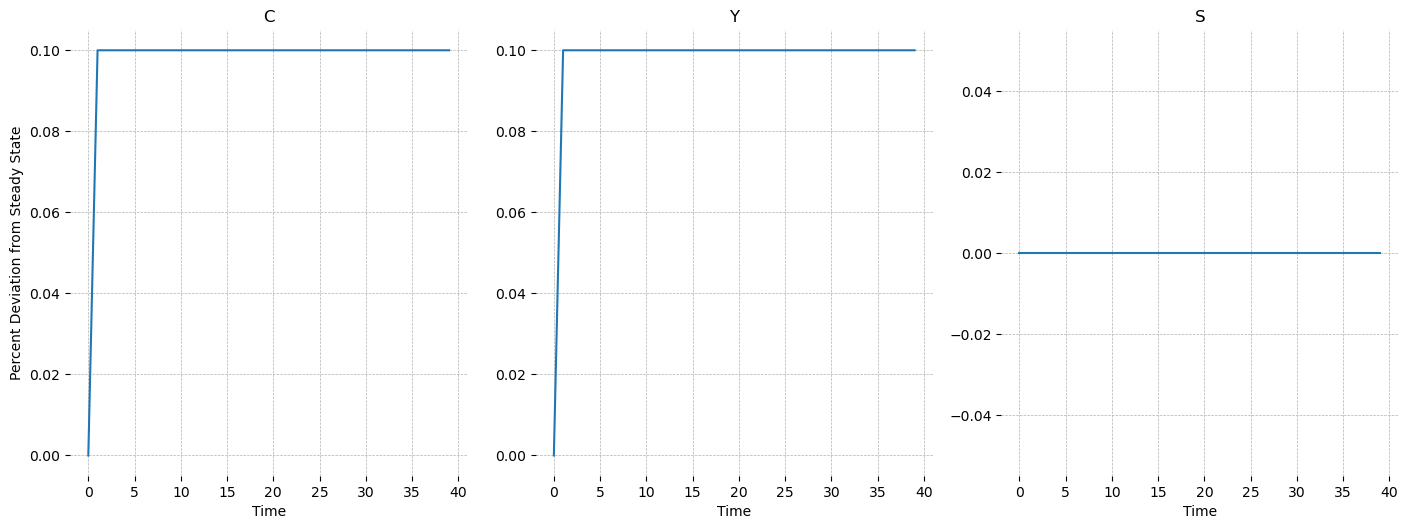

In [8]:
fig = gp.plot_irf(irf.round(4), vars_to_plot=['C', 'Y', 'S'], shocks_to_plot=['income_shock'])
axes = fig.axes
axes[0].set_ylabel('Percent Deviation from Steady State')
plt.show()

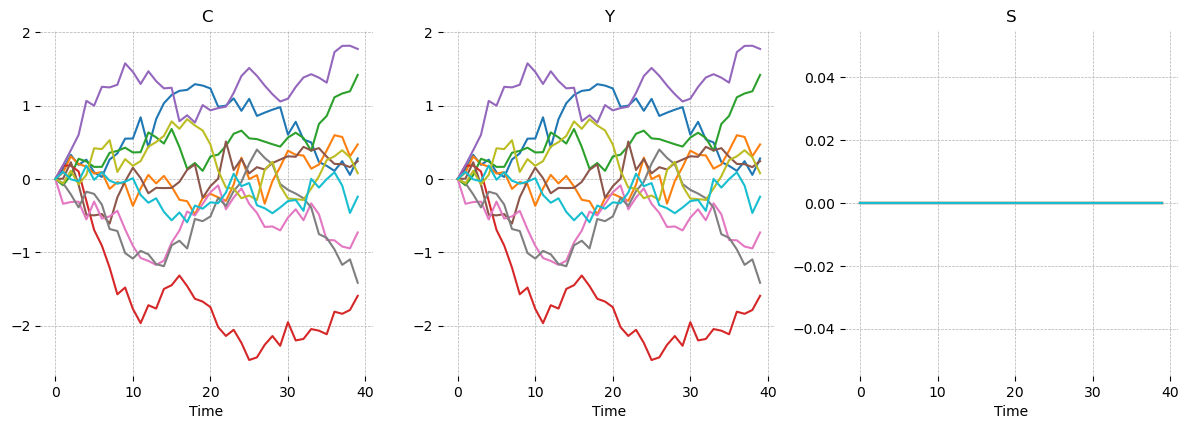

In [9]:
sim_1 = mod_1.simulate(simulation_length=40, shock_cov_matrix=np.eye(1) * 0.03, n_simulations=10)
sim_1 = sim_1.round(3)
gp.plot_simulation(sim_1, vars_to_plot=['C', 'Y', 'S']);